## FEATURIZATION & MODEL TUNING 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline


- **DOMAIN:**  Semiconductor manufacturing process <br/><br/>
- **CONTEXT:**  A  complex  modern  semiconductor  manufacturing  process  is  normally  under  constant  surveillance  via  the  monitoring  of signals/variables  collected  from  sensors  and  or  process  measurement  points.  However,  not  all  of  these  signals  are  equally  valuable  in  a specific  monitoring  system.  The  measured  signals  contain  a  combination  of  useful  information,  irrelevant  information  as  well  as  noise. Engineers  typically  have  a  much  larger  number  of  signals  than  are  actually  required.  If  we  consider  each  type  of  signal  as  a  feature,  then feature  selection  may  be  applied  to  identify  the  most  relevant  signals.  The  Process  Engineers  may  then  use  these  signals  to  determine  key factors  contributing  to  yield  excursions  downstream  in  the  process.  This  will  enable  an  increase  in  process  throughput,  decreased  time  to learning  and  reduce  the  per  unit  production  costs.  These  signals  can  be  used  as  features  to  predict  the  yield  type.  And  by  analysing  and trying out different combinations of features, essential signals that are impacting the yield type can be identified. <br/><br/>
- **DATA DESCRIPTION:** *signal-data.csv : (1567, 592)* <br/>
    The data consists of 1567 datapoints each with 591 features. The  dataset  presented  in  this  case  represents  a  selection  of  such  features  where  each  example  represents  a  single  production  entity  with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to  a pass and “1” corresponds to a fail and the data time stamp is for that specific test point. <br/><br/>
- **PROJECT  OBJECTIVE:**  We  will  build  a  classifier  to  predict  the  Pass/Fail  yield  of  a  particular  process  entity  and  analyse  whether  all  the features are required to build the model or not.

### Steps and tasks: [ Total Score: 60 points]

1. Import and understand the data. [5 Marks]
    <ol style="list-style-type: upper-alpha;">
    <li> Import ‘signal-data.csv’ as DataFrame. [2 Marks] </li>
    <li> Print 5 point summary and share at least 2 observations. [3 Marks]  </li>
    </ol>

In [2]:
#1A. Import 'signal-data.csv' as a dataframe
signal = pd.read_csv('signal-data.csv')

In [3]:
#1B. Print 5 point summary of the data
signal.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


##### 1B. Observations from 5 point summary
- There are  591 numerical columns, if we remove the Pass/Fail  as this the target class (-1 = Pass, 1 = Fail), actually 590 numerical data columns.
- All data follows its own dimensions, data ranges are different per coumn. Therefore we need to do scaling.
- Not all count eqauls, meaning there must be null data points.


2. Data cleansing: [15 Marks] 
    <ol style="list-style-type: upper-alpha;">
    <li> Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]  </li>
    <li> Identify and drop the features which are having same value for all the rows. [3 Marks]   </li>
    <li> Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks] </li>
    <li> Check for multi-collinearity in the data and take necessary action. [3 Marks]</li>
    <li> Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks] </li>
    </ol>

In [4]:
#2A. Write a for loop which will remove all the features  with 20%+ null values and impute rest with mean of the feature.
deleted_20pct = 0
deleted_others = 0
for col in signal.columns:
    if signal[col].dtype == 'float64': #only columns with float64 datatype
        if signal[col].isnull().sum() > 0.2*len(signal):  #columns having more than 20% null values
            signal.drop(col, axis=1, inplace=True)
            deleted_20pct += 1
        elif signal[col].isnull().sum() > 0: #columns havinbg at least 1 null value, but overall less than 20% null values
            signal[col].fillna(signal[col].mean(), inplace=True)
            deleted_others += 1

print('Number of columns deleted (had more than 20%+ null values):', deleted_20pct)
print('Number of columns imputed with mean:', deleted_others)


Number of columns deleted (had more than 20%+ null values): 32
Number of columns imputed with mean: 506


In [5]:
#2B. 
# Identify the features which are having same value for all the rows.
same_value = []
for col in signal.columns:
    if signal[col].nunique() == 1:
        same_value.append(col)

print(f'Features having same value for all rows (Total:{len(same_value)}): {same_value}')


# Drop the features identified in above
signal.drop(same_value, axis=1, inplace=True)


Features having same value for all rows (Total:116): ['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


In [6]:
#2C. Drop other features if required using relevant functional knowledge. Clearly justify the same. 

#First, Dropping the 'Time' column as it is just time stamps when data was collected, does not any information on pass/fail output (just a noise). 
signal.drop('Time', axis=1, inplace=True)

#Second, Check all features with target column 'Pass/Fail' to see drop the column who are less than 0.1 (10%) correlation with target column
#Why 0.01? Because we want to keep the features which have at least some correlation with target column, and 0.1 (10%) is a very low correlation value.

low_corr_columns = []
signal_corr = signal.corr()
for corr in signal_corr['Pass/Fail']:
    if abs(corr) < 0.1:
        low_corr_columns.append(signal_corr[signal_corr['Pass/Fail'] == corr].index[0])

print(f'Columns with less than 0.1 correlation with target column (Total:{len(low_corr_columns)}): {low_corr_columns}')
# Drop the features identified in above
signal.drop(low_corr_columns, axis=1, inplace=True)

Columns with less than 0.1 correlation with target column (Total:428): ['0', '1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '43', '44', '45', '46', '47', '48', '50', '51', '53', '54', '55', '56', '57', '58', '60', '61', '62', '63', '64', '65', '66', '67', '68', '70', '71', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '98', '99', '100', '101', '102', '104', '105', '106', '107', '108', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '142', '143', '144', '145', '146', '147', '148', '150', '151', '152', '153', '154', '155', '156', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '1

Text(0.5, 1.0, 'Correlation heatmap for the Data')

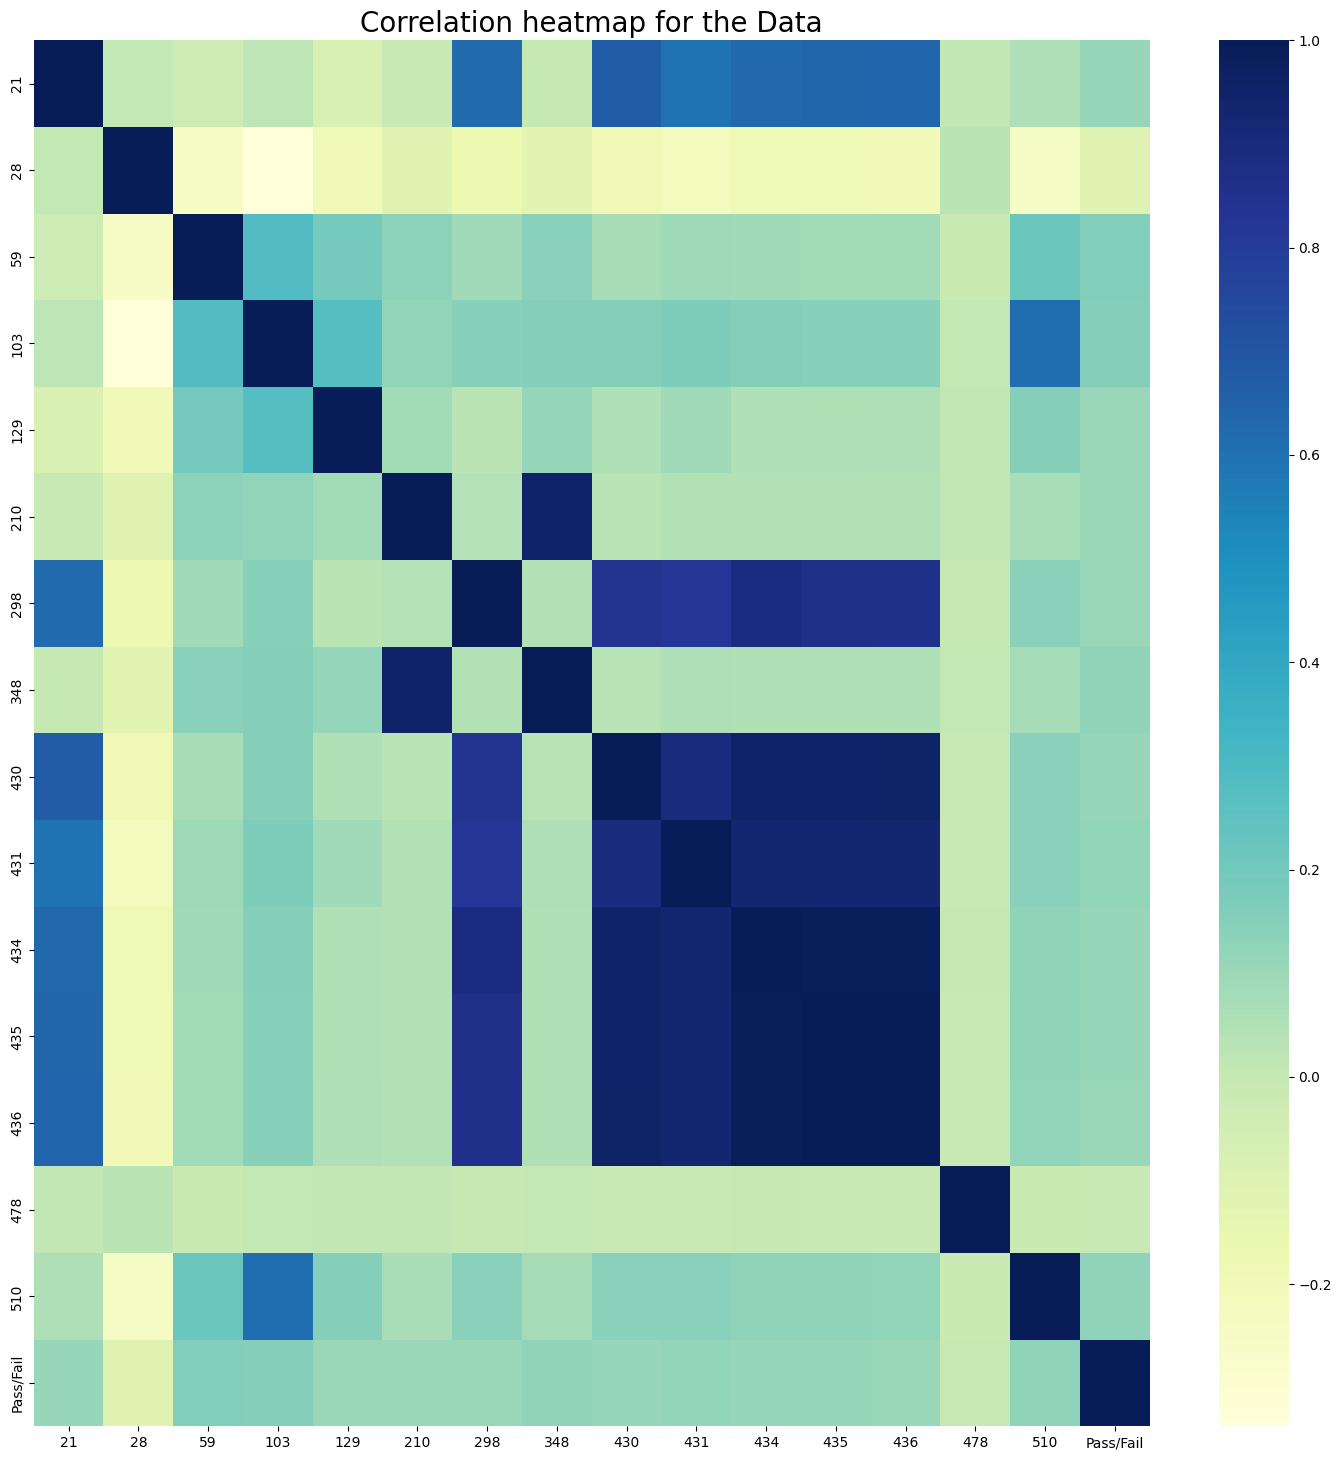

In [7]:
#2D. Check for multi-collinearity in the data and take necessary action.

# First let's show the heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(signal.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)


In [8]:
#Now Calculate the correlation matrix
corr_matrix = signal.corr()
iters = range(len(corr_matrix.columns) - 1)
drop_cols = []

threshold = 0.70 #Threshold for removing correlated variables

# Iterate through the correlation matrix and print correlations which are above threshold. Collect these columns in a list.
for i in iters:
    for j in range(i+1):
        item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = abs(item.values)
        if val >= threshold:
            drop_cols.append(col.values[0])

print(f'{len(drop_cols)} columns have correlations more than threshold ({threshold}), dropping them.')

#Drop the columns collected above to remove multi-collinearity
signal.drop(drop_cols, axis=1, inplace=True)

16 columns have correlations more than threshold (0.7), dropping them.


In [9]:
#2E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.
#Convert target cokumn 'Pass/Fail' to category column
signal['Pass/Fail'] = signal['Pass/Fail'].astype('category')

#In data, -1 means pass and 1 means fail. Let's convert it to 0(fail) and 1 (pass)
signal['Pass/Fail'] = signal['Pass/Fail'].replace(1, 0)
signal['Pass/Fail'] = signal['Pass/Fail'].replace(-1, 1)


3. Data analysis & visualisation: [5 Marks] 
    <ol style="list-style-type: upper-alpha;">
    <li> Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks] </li>
    <li> Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks] </li>
    </ol>

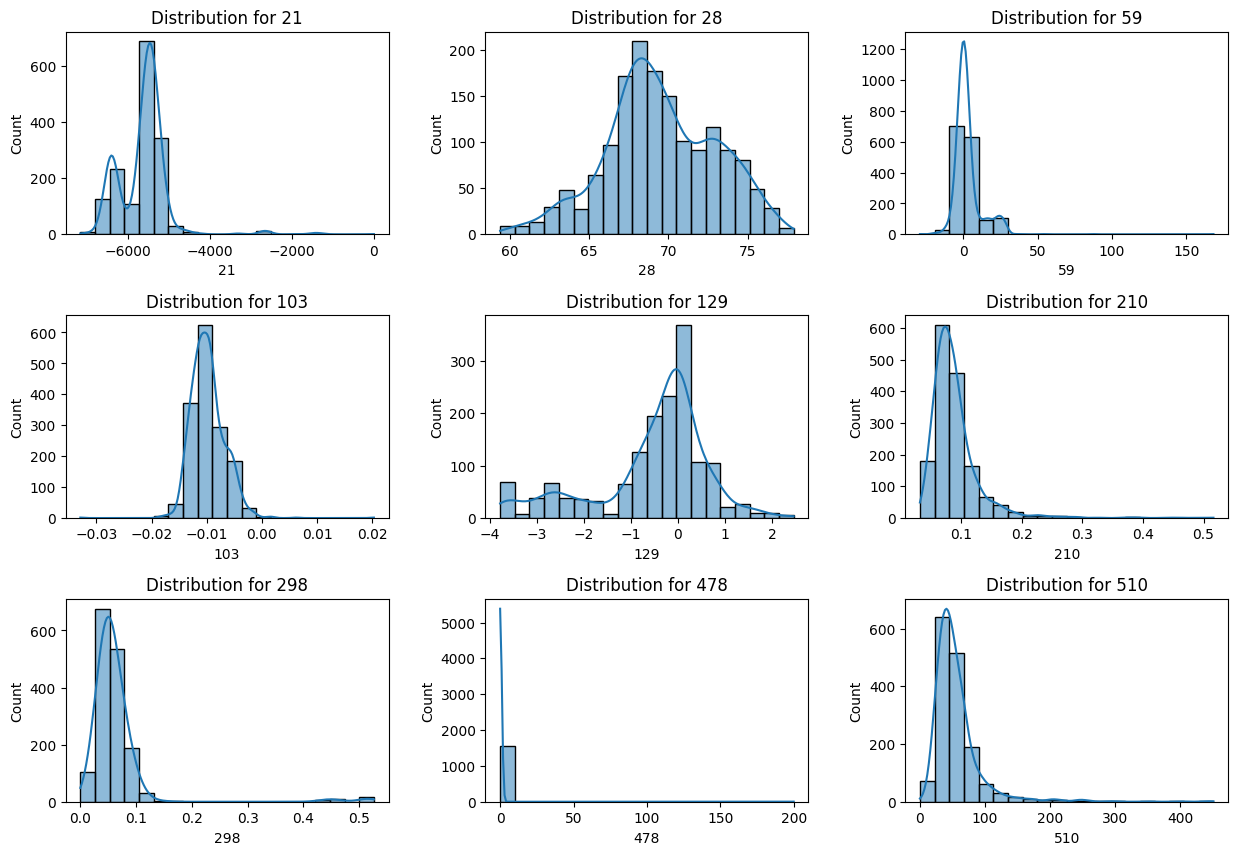

In [10]:
#3A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.
#Plot a histogram for all the features
fig, axes=plt.subplots(3,3,figsize=(15, 10))
r = 0
c = 0
for col in signal.columns:
    if col != 'Pass/Fail':
        sns.histplot(signal[col], kde=True, bins=20, ax=axes[r,c])
        axes[r,c].title.set_text(f"Distribution for {col}")
        c = c+1
        if c == 3:
            r = r+1
            c = 0
fig.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

#### 3A. Observations from above
- All columns except 478 is normal distribution.
- But, some columns are multimodal normal distribution
    - 21 : two peaks
    - 28 : two peaks
    - 129 : two peaks
- Column 478 has lot of outliers - right skewed. It looks most of the values are are between 0 to 10.
- Except 28, 103 and 129, others are mostly right skewed. 

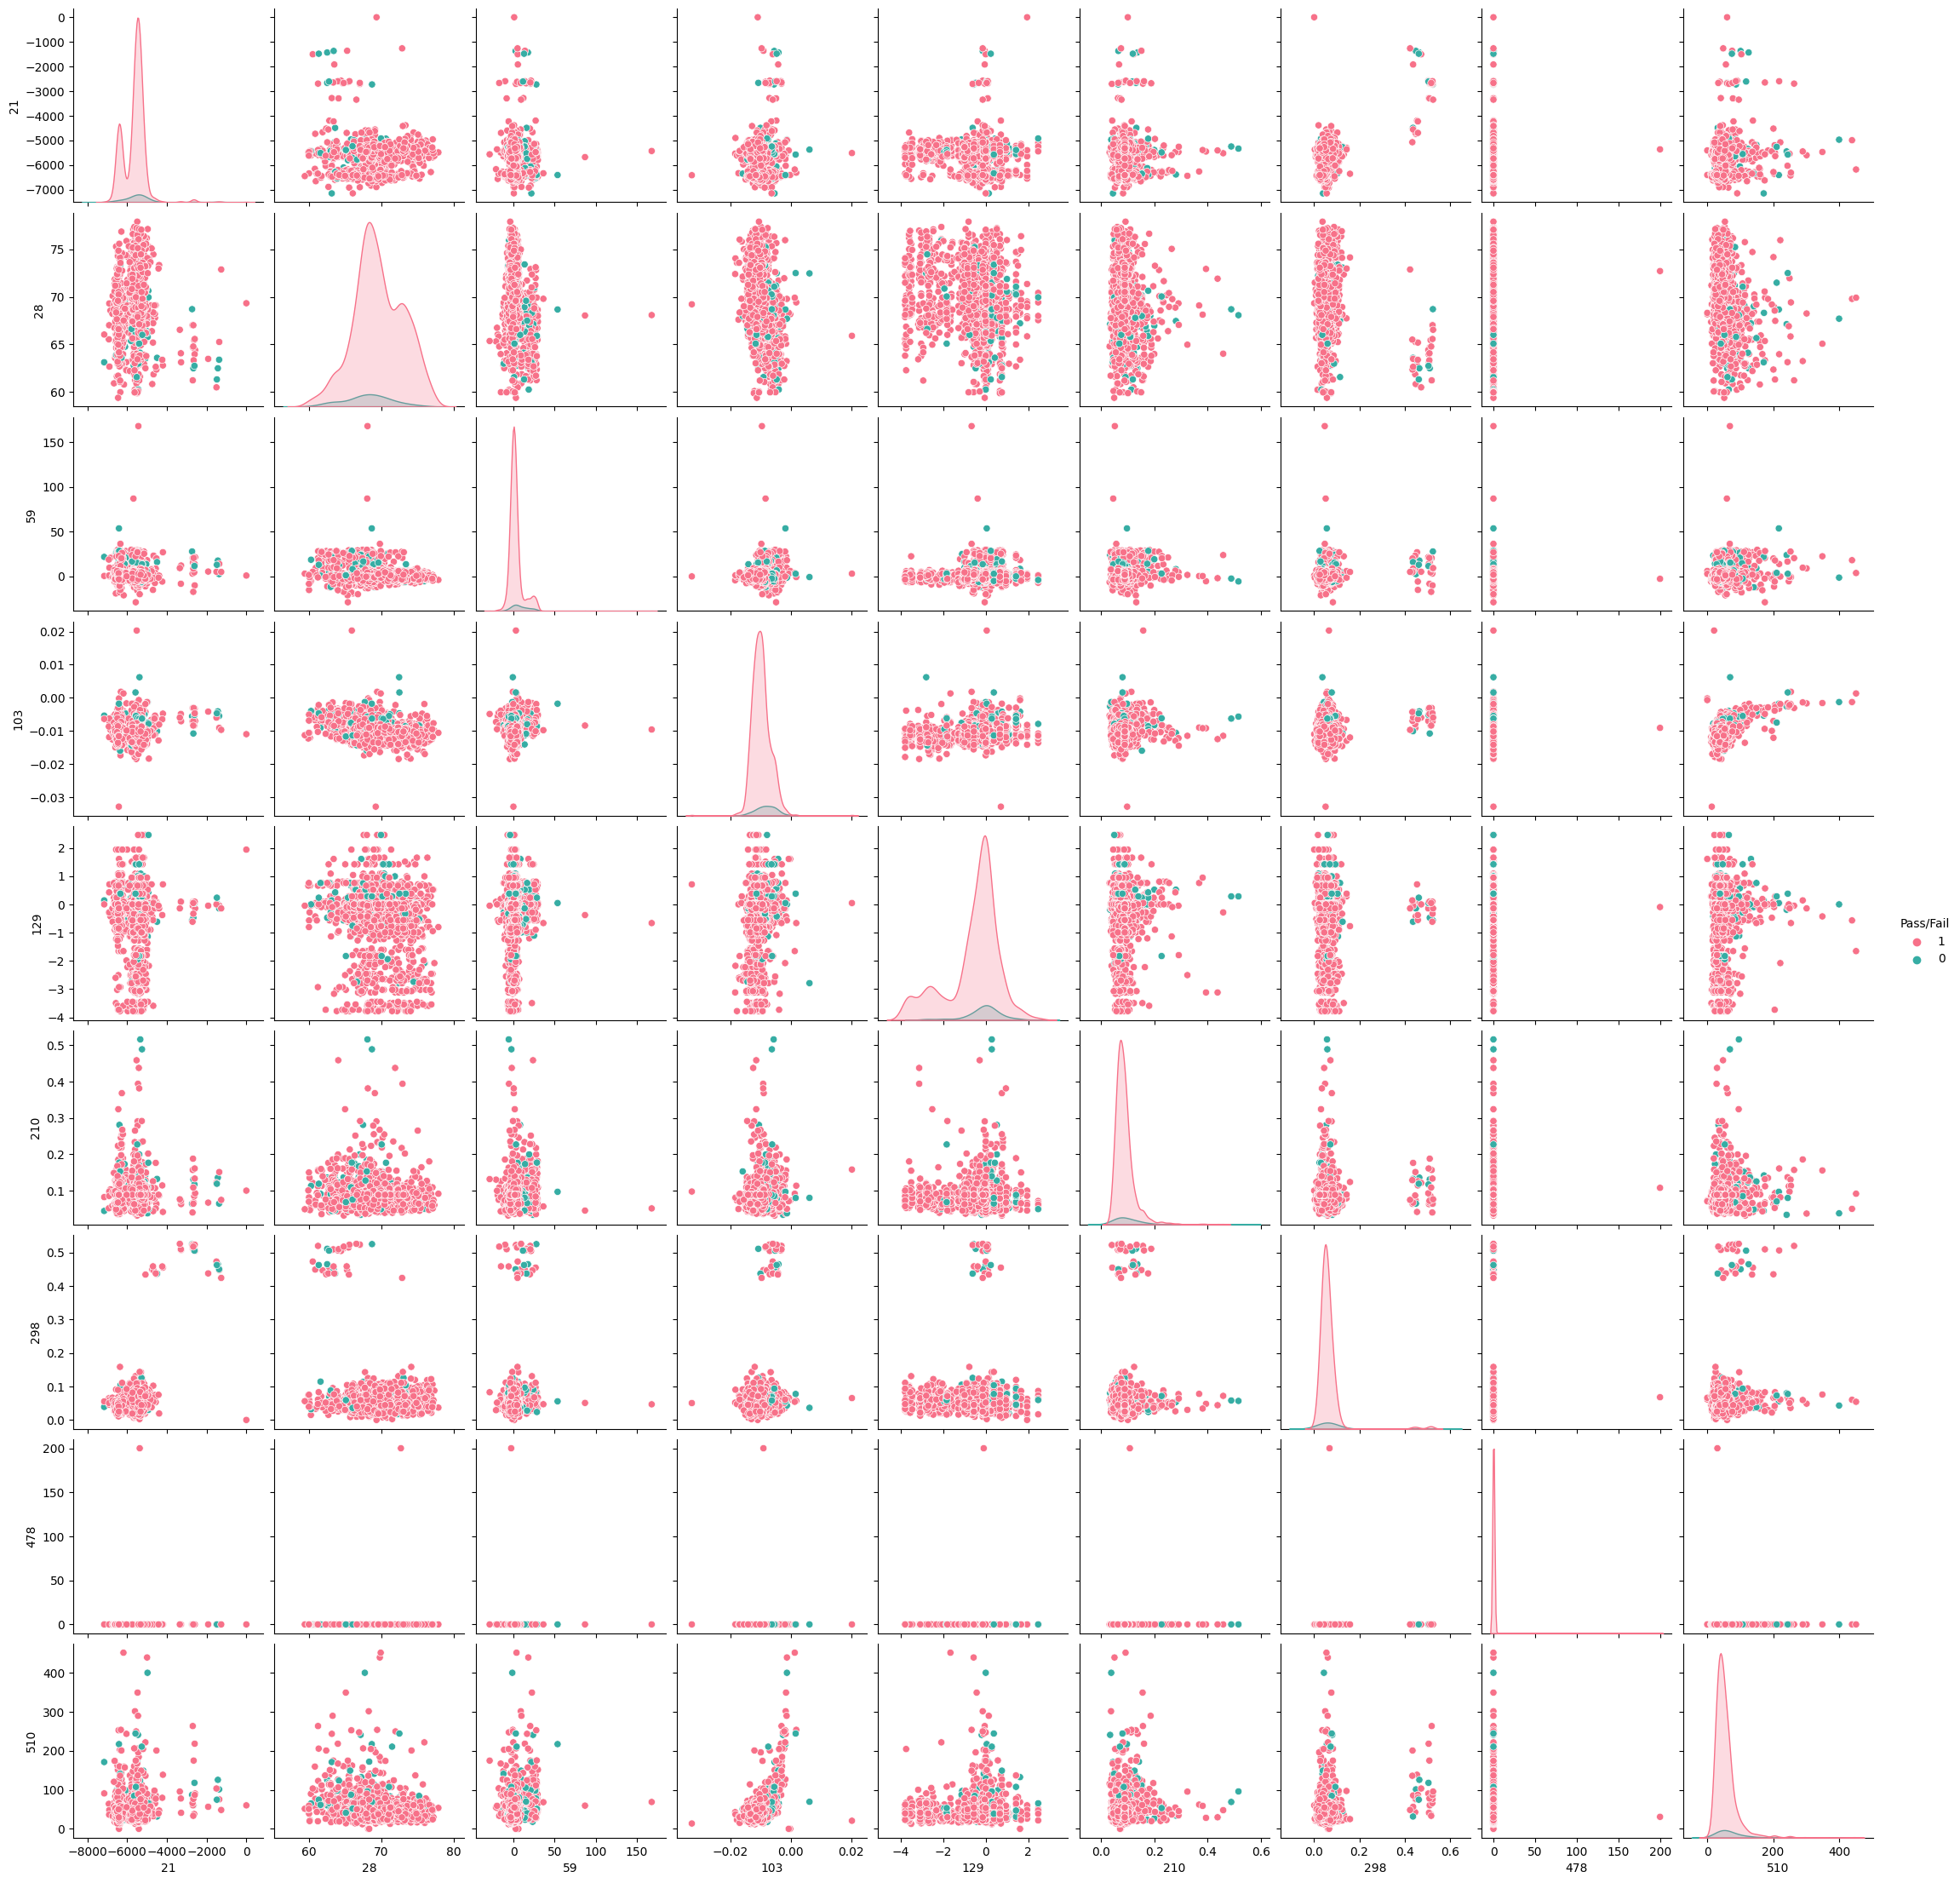

In [11]:
#3B. Perform a detailed bivariate Analysis with appropriate detailed comments after each analysis.
#Plot pair plot for all the features
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
sns.pairplot(signal, hue='Pass/Fail', diag_kind='kde', palette='husl')

#### 3B. Observations from above
- Mostly all the columns are non linear - looks the blob of points. So looks like features are independent of each other.
- Column 478 looks like having single value for both classes - only one outlier. Looks like, his column can be deleted.
- Some relationship has tails, which may be due to presence of outliers.

In [12]:
#Check the unique values and their count for column '478'
signal['478'].value_counts()

478
0.000000      1560
0.128123         6
200.000000       1
Name: count, dtype: int64

In [13]:
#Most of the valus are 0, so let's drop this column
signal.drop('478', axis=1, inplace=True)

4. Data pre-processing: [10 Marks] 
   <ol style="list-style-type: upper-alpha;">
   <li> Segregate predictors vs target attributes. [2 Marks] </li>
   <li> Check for target balancing and fix it if found imbalanced. [3 Marks]  </li>
   <li> Perform train-test split and standardise the data or vice versa if required. [3 Marks]  </li>
   <li> Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]  </li>
   </ol>

In [14]:
#4A. Segrgate predictors vs target attributes and store them separately.
X = signal.drop('Pass/Fail', axis=1)
y = signal['Pass/Fail']

In [15]:
#4B. Check the target balancing and fix it if found imbalanced.
#Check the target balancing
y.value_counts()


Pass/Fail
1    1463
0     104
Name: count, dtype: int64

In [16]:
#Looks like the target is imbalanced, so let's balance it using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
y.value_counts()


Pass/Fail
1    1463
0    1463
Name: count, dtype: int64

In [17]:
#4C. Perform train-test split and standardise the data or vice versa if required.
#Perform train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,test_size=0.3, random_state=42)


In [18]:
#standardise the data or vice versa if required.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
#4D. Check if the train and test data have similar statistical characteristics when compared with original data.

#Five point summary for original data
signal.describe().T


,count,mean,std,min,25%,50%,75%,max
21,1567.0,-5618.393610,626.421781,-7150.2500,-5932.62500,-5523.2500,-5356.62500,0.0000
28,1567.0,69.499532,3.458970,59.4000,67.38335,69.1556,72.25555,77.9000
59,1567.0,2.960241,9.510891,-28.9882,-1.85545,0.9736,4.33770,168.1455
103,1567.0,-0.009789,0.003063,-0.0329,-0.01180,-0.0101,-0.00820,0.0203
129,1567.0,-0.554228,1.216967,-3.7790,-0.89880,-0.1419,0.04730,2.4580
210,1567.0,0.088866,0.041741,0.0319,0.06590,0.0803,0.09905,0.5164
298,1567.0,0.063804,0.064184,0.0000,0.04070,0.0528,0.06920,0.5264
510,1567.0,55.763508,37.667659,0.0000,35.32440,47.0588,64.22845,451.4851


In [20]:
#Five point summary for transformed train data
pd.DataFrame(X_train).describe().T

,count,mean,std,min,25%,50%,75%,max
0,2048.0,-4.857226e-16,1.000244,-2.079010,-0.301980,0.026147,0.234844,6.926101
1,2048.0,1.956768e-15,1.000244,-2.958484,-0.582985,-0.057997,0.614628,2.832503
2,2048.0,-5.551115e-17,1.000244,-3.543257,-0.610236,-0.257062,0.438774,16.630631
3,2048.0,1.075529e-16,1.000244,-7.607109,-0.688190,-0.080322,0.619072,9.355403
4,2048.0,2.905662e-17,1.000244,-3.439689,-0.234848,0.251466,0.520530,2.784767
5,2048.0,-2.602085e-16,1.000244,-1.312488,-0.562795,-0.232748,0.283353,8.826304
6,2048.0,-1.734723e-18,1.000244,-0.880919,-0.363488,-0.212602,-0.020475,5.323708
7,2048.0,2.862294e-17,1.000244,-1.552635,-0.595491,-0.268856,0.217139,9.637890


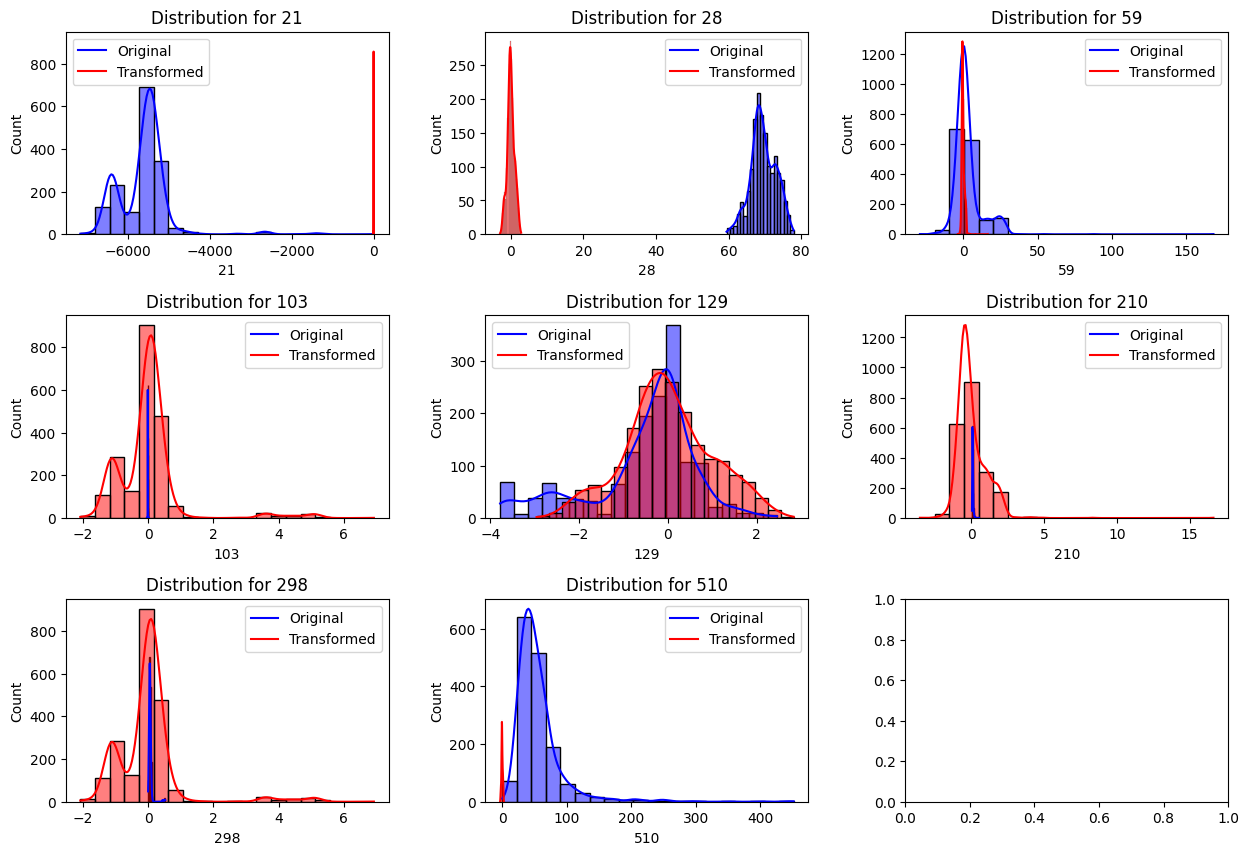

In [21]:
#Create distribution plots for original data and transformed train data for each fetures with different color plots
fig, axes=plt.subplots(3,3,figsize=(15, 10))
r = 0
c = 0
for col in signal.columns:
    if col != 'Pass/Fail':
        sns.histplot(signal[col], kde=True, bins=20, ax=axes[r,c], color='blue')
        sns.histplot(X_train[:,c], kde=True, bins=20, ax=axes[r,c], color='red')
        axes[r,c].title.set_text(f"Distribution for {col}")
        axes[r,c].legend(['Original', 'Transformed'])
        c = c+1
        if c == 3:
            r = r+1
            c = 0
fig.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

#### Obsevations
- From comparing the Five point summary of the train data and original data, we can see that they are entirely different after upsampling and scaling.
- From the graph, it is evident the train data (red) is now centered around mean zero and standard diviation is upto magnitude 
- Otherwise the shape of the distribution almost similar. 

5. Model training, testing and tuning: [20 Marks] 
    <ol style="list-style-type: upper-alpha;">
    <li> Use any Supervised Learning technique to train a model. [2 Marks] </li>
    <li> Use cross validation techniques. [3 Marks] </li> 
     Hint: Use all CV techniques that you have learnt in the course. 
    <li> Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks] <br/>
    Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. </li>  
    <li> Use any other technique/method which can enhance the model performance. [4 Marks] 
     Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc. </li> 
    <li> Display and explain the classification report in detail. [3 Marks] </li>
    <li> Apply the above steps for all possible models that you have learnt so far. [5 Marks] </li>
    </ol>

In [22]:
#5A. Use any Supervised learning technique to train a model.
#Using Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logreg_base = LogisticRegression()
logreg_base.fit(X_train, y_train)

#Create a dataframe with columns 'Model', 'Hyper-parameter tuninng method', 'Best Parameters', 'Accuracy Score (Train Data)', 'Accuracy Score (Test Data)'
hp_scores = pd.DataFrame(columns=['Model', 'Hyper-parameter tuninng method', 'Best Parameters', 'Accuracy Score (Train Data)', 'Accuracy Score (Test Data)'])

#Append the scores to the dataframe
hp_scores.loc[len(hp_scores.index)] = {'Model':'Logistic Regression (Base Model)', 'Hyper-parameter tuninng method':'None', 'Best Parameters':'-', 
                                       'Accuracy Score (Train Data)':accuracy_score(y_train, logreg_base.predict(X_train)),
                                       'Accuracy Score (Test Data)':accuracy_score(y_test, logreg_base.predict(X_test))}


#Show the dataframe
hp_scores


,Model,Hyper-parameter tuninng method,Best Parameters,Accuracy Score (Train Data),Accuracy Score (Test Data)
0,Logistic Regression (Base Model),None,-,0.737793,0.741458


In [23]:
#5B. Use cross validation techniques to get the best accuracy on unseen data.

logreg = logreg_base

#Using cross_val_score
from sklearn.model_selection import cross_val_score

#Create a dataframe with columns 'Model', 'Cross Validation Type', 'Cross Validation Score', 'Average Cross Validation Score'
cv_scores = pd.DataFrame(columns=['Model', 'Cross Validation Type', 'Cross Validation Score', 'Average Cross Validation Score'])


#Use k-fold cross validation and get the average score
from sklearn.model_selection import KFold
num_folds = 10
kfold = KFold(n_splits=num_folds)
scores = cross_val_score(logreg, X_train, y_train, cv=kfold)
#Append the scores to the dataframe
cv_scores.loc[len(cv_scores.index)] = {'Model':'Logistic Regression', 'Cross Validation Type':'KFold', 'Cross Validation Score':scores, 'Average Cross Validation Score':scores.mean()}

#Use leave one out cross validation and get the average score
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
scores = cross_val_score(logreg, X_train, y_train, cv=loocv)
#Append the scores to the dataframe
cv_scores.loc[len(cv_scores.index)] = {'Model':'Logistic Regression', 'Cross Validation Type':'LeaveOneOut', 'Cross Validation Score':scores, 'Average Cross Validation Score':scores.mean()}

#Use stratified k-fold cross validation and get the average score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=num_folds)
scores = cross_val_score(logreg, X_train, y_train, cv=skfold)
#Append the scores to the dataframe
cv_scores.loc[len(cv_scores.index)] = {'Model':'Logistic Regression', 'Cross Validation Type':'StratifiedKFold', 'Cross Validation Score':scores, 'Average Cross Validation Score':scores.mean()}

#Use Bootstrapping cross validation and get the average score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
n_iterations = 100
n_size = int(len(X_train) * 0.50)
scores = []
for i in range(n_iterations):
    X_train_resample, y_train_resample = resample(X_train, y_train, n_samples=n_size)
    logreg.fit(X_train_resample, y_train_resample)
    y_pred = logreg.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
#Append the scores to the dataframe
cv_scores.loc[len(cv_scores.index)] = {'Model':'Logistic Regression', 'Cross Validation Type':'Bootstrapping', 'Cross Validation Score':scores, 'Average Cross Validation Score':np.mean(scores)}

#Show the score Dataframe
cv_scores



,Model,Cross Validation Type,Cross Validation Score,Average Cross Validation Score
0,Logistic Regression,KFold,"[0.7024390243902439, 0.7317073170731707, 0.707...",0.730450
1,Logistic Regression,LeaveOneOut,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",0.732422
2,Logistic Regression,StratifiedKFold,"[0.6926829268292682, 0.7609756097560976, 0.692...",0.734347
3,Logistic Regression,Bootstrapping,"[0.7232346241457859, 0.734624145785877, 0.7061...",0.736367


In [24]:
#5C. Apply hyper-parameter tuning to get the best accuracy from the selected model.
#Using GridSearchCV with accuracy as score measure
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV



acc_scorer = make_scorer(accuracy_score)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['C'] = [0.01, 0.1, 1, 10, 100, 1000, 10000]

grid_search = GridSearchCV(LogisticRegression(), space, scoring=acc_scorer, cv=5)
grid_search.fit(X_train, y_train)
#append the scores to the dataframe
hp_scores.loc[len(hp_scores.index)] = {'Model':'Logistic Regression', 'Hyper-parameter tuninng method':'GridSearchCV', 'Best Parameters':grid_search.best_params_, 
                                       'Accuracy Score (Train Data)':accuracy_score(y_train, grid_search.predict(X_train)),
                                       'Accuracy Score (Test Data)':accuracy_score(y_test, grid_search.predict(X_test))}

#Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['C'] = loguniform(1e-3, 10)

random_search = RandomizedSearchCV(logreg, space, scoring=acc_scorer, cv=5)
random_search.fit(X_train, y_train)
#append the scores to the dataframe
hp_scores.loc[len(hp_scores.index)] = {'Model':'Logistic Regression', 'Hyper-parameter tuninng method':'RandomizedSearchCV', 'Best Parameters':random_search.best_params_, 
                                       'Accuracy Score (Train Data)':accuracy_score(y_train, random_search.predict(X_train)),
                                       'Accuracy Score (Test Data)':accuracy_score(y_test, random_search.predict(X_test))}

#Show the dataframe
hp_scores


,Model,Hyper-parameter tuninng method,Best Parameters,Accuracy Score (Train Data),Accuracy Score (Test Data)
0,Logistic Regression (Base Model),None,-,0.737793,0.741458
1,Logistic Regression,GridSearchCV,"{'C': 1, 'solver': 'newton-cg'}",0.737793,0.741458
2,Logistic Regression,RandomizedSearchCV,"{'C': 0.04486405832867217, 'solver': 'newton-cg'}",0.738281,0.742597


In [25]:
#5D. Use any other technique/method which can enhance the model performance.

#Techniques can be used : Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing 
#We have already did feature removal, normalization (scaling) and upsampling (to balance the target) in previous steps.
#Let's try dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) #95% variance explained by the features
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'Number of columns brfore PCA: {X_train.shape[1]}')
print(f'Number of columns after  PCA: {X_train_pca.shape[1]}')


#Create a new model with PCA transformed data
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

#Let's check the accuracy score of this model
y_pred = logreg_pca.predict(X_test_pca)
accuracy_score(y_test, y_pred) 

#Append the scores to the dataframe
hp_scores.loc[len(hp_scores.index)] = {'Model':'Logistic Regression (PCA)', 'Hyper-parameter tuninng method':'None', 'Best Parameters':'-', 
                                       'Accuracy Score (Train Data)':accuracy_score(y_train, logreg_pca.predict(X_train_pca)),
                                       'Accuracy Score (Test Data)':accuracy_score(y_test, logreg_pca.predict(X_test_pca))}

#Show the dataframe
hp_scores


Number of columns brfore PCA: 8
Number of columns after  PCA: 7


,Model,Hyper-parameter tuninng method,Best Parameters,Accuracy Score (Train Data),Accuracy Score (Test Data)
0,Logistic Regression (Base Model),None,-,0.737793,0.741458
1,Logistic Regression,GridSearchCV,"{'C': 1, 'solver': 'newton-cg'}",0.737793,0.741458
2,Logistic Regression,RandomizedSearchCV,"{'C': 0.04486405832867217, 'solver': 'newton-cg'}",0.738281,0.742597
3,Logistic Regression (PCA),None,-,0.728516,0.736902


In [26]:
#Score is improved, let's try to tune the hyper-parameters of this model
#Using GridSearchCV with accuracy as score measure

acc_scorer = make_scorer(accuracy_score)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['C'] = [0.01, 0.1, 1, 10, 100, 1000, 10000]

grid_search_pca = GridSearchCV(LogisticRegression(), space, scoring=acc_scorer, cv=5)
grid_search_pca.fit(X_train_pca, y_train)

#Append the scores to the dataframe
hp_scores.loc[len(hp_scores.index)] = {'Model':'Logistic Regression (PCA)', 'Hyper-parameter tuninng method':'GridSearchCV', 'Best Parameters':grid_search_pca.best_params_, 
                                       'Accuracy Score (Train Data)':accuracy_score(y_train, grid_search_pca.predict(X_train_pca)),
                                       'Accuracy Score (Test Data)':accuracy_score(y_test, grid_search_pca.predict(X_test_pca))}

#Show the Dataframe
hp_scores


,Model,Hyper-parameter tuninng method,Best Parameters,Accuracy Score (Train Data),Accuracy Score (Test Data)
0,Logistic Regression (Base Model),None,-,0.737793,0.741458
1,Logistic Regression,GridSearchCV,"{'C': 1, 'solver': 'newton-cg'}",0.737793,0.741458
2,Logistic Regression,RandomizedSearchCV,"{'C': 0.04486405832867217, 'solver': 'newton-cg'}",0.738281,0.742597
3,Logistic Regression (PCA),None,-,0.728516,0.736902
4,Logistic Regression (PCA),GridSearchCV,"{'C': 0.1, 'solver': 'newton-cg'}",0.727539,0.738041


In [27]:
#5E. Display and explain the classification report in detail.
#Using the best model from above, let's predict the target column for test data
y_pred = grid_search.predict(X_test)
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       439
           1       0.74      0.74      0.74       439

    accuracy                           0.74       878
   macro avg       0.74      0.74      0.74       878
weighted avg       0.74      0.74      0.74       878



#### Explaination of the above classification report

- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
    - High precision relates to the low false positive rate. We have got 74% precision for both the target classes.
- Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
    - High recall relates to the low false negative rate. We have got 74% recall for both the target classes.
- F1 score: F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
    - We have got F1-Score of 0.74 for both the target classes.
- Accuracy: Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
    - We have got 0.74 accuracy
- Support: Support is the number of actual occurrences of the class in the specified dataset. In our case, the support for class 0 is 439 and for class 1 is 439 (balanced).
- Macro avg: Macro average is the average of precision, recall and f1-score between classes. In our case, the macro avg for precision, recall and f1-score is 0.74
- Weighted avg: Weighted average is the weighted average of precision, recall and f1-score between classes. In our case, the weighted avg for precision, recall and f1-score is 0.74
- So, overall, the model is performing consistently, but its average model, not have high accuracy.


In [28]:
#5F. Apply the above steps for all possible models that you have learnt so far.

#Create a function which performs all the above steps for a given model

def run_model(model, model_name, X_train, y_train, X_test, y_test, gird_search_params=None):
    print(f'Running model {model_name}...')

    model.fit(X_train, y_train)
    #Append the scores to the dataframe
    hp_scores.loc[len(hp_scores.index)] = {'Model':model_name, 'Hyper-parameter tuninng method':'None', 'Best Parameters':'-', 
                                       'Accuracy Score (Train Data)':accuracy_score(y_train, model.predict(X_train)),
                                       'Accuracy Score (Test Data)':accuracy_score(y_test, model.predict(X_test))}

    print(f'   Tuning model {model_name} using GridSearchCV...')
    #using GridSearchCV    
    model_grid_search = GridSearchCV(model, gird_search_params, scoring=acc_scorer, cv=5)
    model_grid_search.fit(X_train, y_train)
    #append the scores to the dataframe
    hp_scores.loc[len(hp_scores.index)] = {'Model':model_name, 'Hyper-parameter tuninng method':'GridSearchCV', 'Best Parameters':model_grid_search.best_params_, 
                                       'Accuracy Score (Train Data)':accuracy_score(y_train, model_grid_search.predict(X_train)),
                                       'Accuracy Score (Test Data)':accuracy_score(y_test, model_grid_search.predict(X_test))}



#Try the above function for multiple models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#convert the above in a for loop
models =               [KNeighborsClassifier(),       DecisionTreeClassifier(),   RandomForestClassifier(),           SVC(),                                                                   GaussianNB(),                                  AdaBoostClassifier(),                                                     GradientBoostingClassifier()]
model_names =          ['KNN',                       'Decision Tree',             'Random Forest',                    'SVM',                                                                   'Naive Bayes',                                 'AdaBoost',                                                               'Gradient Boosting']
grid_search_params =   [{'n_neighbors':range(1, 20)}, {'max_depth':range(1, 30)}, {'n_estimators':range(10, 100, 5)}, {'C':[0.01, 0.1, 1, 10, 100, 1000, 10000], 'kernel':['rbf', 'sigmoid']}, {'var_smoothing': np.logspace(0,-9, num=100)}, {'n_estimators':range(1, 100, 5), 'learning_rate':[0.001, 0.01, 0.1, 1]}, {'n_estimators':range(1, 100, 5), 'learning_rate':[0.001, 0.01, 0.1, 1]}]
for best_model, model_name, grid_search_param in zip(models, model_names, grid_search_params):
    run_model(best_model, model_name, X_train, y_train, X_test, y_test, grid_search_param)
    run_model(best_model, model_name+'(PCA)', X_train_pca, y_train, X_test_pca, y_test, grid_search_param) #With PCA

#Show the dataframe
hp_scores

Running model KNN...
   Tuning model KNN using GridSearchCV...
Running model KNN(PCA)...
   Tuning model KNN(PCA) using GridSearchCV...
Running model Decision Tree...
   Tuning model Decision Tree using GridSearchCV...
Running model Decision Tree(PCA)...
   Tuning model Decision Tree(PCA) using GridSearchCV...
Running model Random Forest...
   Tuning model Random Forest using GridSearchCV...
Running model Random Forest(PCA)...
   Tuning model Random Forest(PCA) using GridSearchCV...
Running model SVM...
   Tuning model SVM using GridSearchCV...
Running model SVM(PCA)...
   Tuning model SVM(PCA) using GridSearchCV...
Running model Naive Bayes...
   Tuning model Naive Bayes using GridSearchCV...
Running model Naive Bayes(PCA)...
   Tuning model Naive Bayes(PCA) using GridSearchCV...
Running model AdaBoost...
   Tuning model AdaBoost using GridSearchCV...
Running model AdaBoost(PCA)...
   Tuning model AdaBoost(PCA) using GridSearchCV...
Running model Gradient Boosting...
   Tuning model G

,Model,Hyper-parameter tuninng method,Best Parameters,Accuracy Score (Train Data),Accuracy Score (Test Data)
0,Logistic Regression (Base Model),None,-,0.737793,0.741458
1,Logistic Regression,GridSearchCV,"{'C': 1, 'solver': 'newton-cg'}",0.737793,0.741458
2,Logistic Regression,RandomizedSearchCV,"{'C': 0.04486405832867217, 'solver': 'newton-cg'}",0.738281,0.742597
3,Logistic Regression (PCA),None,-,0.728516,0.736902
4,Logistic Regression (PCA),GridSearchCV,"{'C': 0.1, 'solver': 'newton-cg'}",0.727539,0.738041
5,KNN,None,-,0.890625,0.837130
6,KNN,GridSearchCV,{'n_neighbors': 1},1.000000,0.873576
7,KNN(PCA),None,-,0.891602,0.828018
8,KNN(PCA),GridSearchCV,{'n_neighbors': 1},1.000000,0.879271
9,Decision Tree,None,-,1.000000,0.861048


6. Post Training and Conclusion: [5 Marks] 
    <ol style="list-style-type: upper-alpha;">
    <li> Display and compare all the models designed with their train and test accuracies. [1 Marks] </li>
    <li> Select the final best trained model along with your detailed comments for selecting this model. [1 Marks] </li> 
    <li> Pickle the selected model for future use. [2 Marks] </li> 
    <li> Write your conclusion on the results. [1 Marks] </li>
    </ol>

In [30]:
#6A. Display and compare all the models designed with their train and test accuracy scores.
#Show the dataframe
hp_scores

,Model,Hyper-parameter tuninng method,Best Parameters,Accuracy Score (Train Data),Accuracy Score (Test Data)
0,Logistic Regression (Base Model),None,-,0.737793,0.741458
1,Logistic Regression,GridSearchCV,"{'C': 1, 'solver': 'newton-cg'}",0.737793,0.741458
2,Logistic Regression,RandomizedSearchCV,"{'C': 0.04486405832867217, 'solver': 'newton-cg'}",0.738281,0.742597
3,Logistic Regression (PCA),None,-,0.728516,0.736902
4,Logistic Regression (PCA),GridSearchCV,"{'C': 0.1, 'solver': 'newton-cg'}",0.727539,0.738041
5,KNN,None,-,0.890625,0.837130
6,KNN,GridSearchCV,{'n_neighbors': 1},1.000000,0.873576
7,KNN(PCA),None,-,0.891602,0.828018
8,KNN(PCA),GridSearchCV,{'n_neighbors': 1},1.000000,0.879271
9,Decision Tree,None,-,1.000000,0.861048


#### 6B. Select the best model 
 - We can see that the model with highest test data accuracy is Random Forest with default parameters. But here the training test accuracy is 1.0, which means it is overfitted.
 - Next best is also Random Forest with n_estimators=95, but here alsie training data acuuracy is 1.0. So, most likely this is also overfitted.
 - Looks, like SVM with C=1000 and kernel = 'rbf' is the balanced and best model here with test accuracy of 0.891800/
 - We can also see that the PCA transformed data has almost same accuracy score as the original data, mostly because the the features we have currently is almost independent, 7 out of 8 features explaining variance of 95%.


In [31]:
#6C Pickle the selected model for futere use
import pickle

#create the SVM model with parameters C=1000 and kernel='rbf' as it has the best accuracy score and data is not looks like overfitted.
best_model = SVC(C=1000, kernel='rbf')
#fit the model
best_model.fit(X_train, y_train)
#now save the model
pickle.dump(best_model, open('model.pkl','wb'))


#### 6D. Final conclusion on the result
- We have used a dataset with 590 columns and 1567 rows.
- We have performed data cleaning, data transformation, data visualization, feature selection, feature engineering, data modeling, hyper-parameter tuning and cross validation.
- We have used multiple models and compared their performance.
- We have used PCA to reduce the number of features.
- We have used SMOTE to balance the target column.
- We have used GridSearchCV and RandomizedSearchCV to tune the hyper-parameters.
- We have used multiple cross validation techniques to get the best accuracy score.
- We have used pickle to save the best model for future use.
- We have achieved an accuracy score of 89% for for test data.
- We can use this model to predict the target column for new data.
